# DATASET WITH NO DUPLICATES

# TRAINING 

In [1]:
import json
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
TRAINING_SET = './dataset_splitted/training_no_dup.json'
VALIDATION_SET = './dataset_splitted/validation.json'

In [3]:
SEED_RND = 20201123

In [4]:
def read_dataset(path):
    #load dataset
    file_dataset = open(path, 'r')
    dataset_json = json.load(file_dataset)

    x_meaning  = dataset_json['x_meaning']
    y_meaning  = dataset_json['y_meaning']

    #EXTRACT DATASET
    X = []
    Y = []
    IDs = []
    for elem in dataset_json['dataset']:
        X.append(elem['x'])
        Y.append(elem['y'])
        IDs.append(elem['ID'])

    dict_out = {}
    dict_out['x_meaning'] = x_meaning
    dict_out['y_meaning'] = y_meaning
    dict_out['IDs'] = IDs
    dict_out['X'] = X 
    dict_out['Y'] = Y

    file_dataset.close()
    return dict_out

In [5]:
train_set = read_dataset(TRAINING_SET)
X_train = train_set['X']
Y_train = train_set['Y']

validation_set = read_dataset(VALIDATION_SET)
X_val = validation_set['X']
Y_val = validation_set['Y']

In [13]:
[len(X_train), len(Y_train)], [len(X_val), len(Y_val)]

([3666, 3666], [645, 645])

In [12]:
for x in X_val:
    if x in X_train:
        print('Error')

In [11]:
x_meaning = train_set['x_meaning']
y_meaning = train_set['y_meaning']

In [14]:
def plot_conf_matrix(title, ground_truths, predictions):
    labels = [1,2,3,4]
    cm = confusion_matrix(ground_truths, predictions, labels)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    #plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)

    rect = patches.Rectangle((50,100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')

    ax.text(-2.5, 0, str(y_meaning[1]), fontsize=15,  color='black')
    ax.text(-2.5, 1, str(y_meaning[2]), fontsize=15,  color='black')
    ax.text(-2.5, 2, str(y_meaning[3]), fontsize=15,  color='black')
    ax.text(-2.5, 3, str(y_meaning[4]), fontsize=15,  color='black')

    plt.title(title+'\n')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [6]:
def scores(model, dataset, ground_truth):
    y_pred = model.predict(dataset)
    accuracy=accuracy_score(ground_truth, y_pred)
    f1=f1_score(ground_truth, y_pred, average='weighted')
    return accuracy, f1

## RANDOM FOREST

In [7]:
from sklearn.ensemble import RandomForestClassifier

## Find a good number of estimators

In [11]:
y_pred_train = []
y_pred_test = []

n_estimators = []

for n_estim in range(1,1000, 10):
    random_forest_clf = RandomForestClassifier(n_estimators=n_estim, n_jobs=-1, random_state=SEED_RND)
    random_forest_clf.fit(X_train, Y_train)

    n_estimators.append(n_estim)
    y_pred_train.append(random_forest_clf.predict(X_train))
    y_pred_test.append(random_forest_clf.predict(X_val))



### Compare Accuracy and F1 Score

In [12]:
accuracy_train=[]
f1_score_train=[]

accuracy_test=[]
f1_score_test=[]

for i in range(0, len(n_estimators)):
    accuracy_train.append(accuracy_score(Y_train, y_pred_train[i]))
    f1_score_train.append(f1_score(Y_train, y_pred_train[i], average='weighted'))

    accuracy_test.append(accuracy_score(Y_val, y_pred_test[i]))
    f1_score_test.append(f1_score(Y_val, y_pred_test[i], average='weighted'))

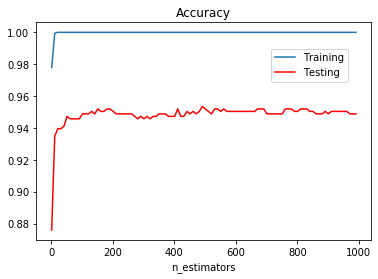

In [13]:
plt.plot(n_estimators, accuracy_train,'-', label='Training')
plt.plot(n_estimators, accuracy_test, 'r-', label='Testing')
plt.legend(bbox_to_anchor=(0.7, 0.88), loc='upper left', borderaxespad=0.)

plt.xlabel("n_estimators")
plt.title("Accuracy")
#plt.savefig(os.path.join(PATH_RESULTS, filename_learn + '.png'))
plt.show()

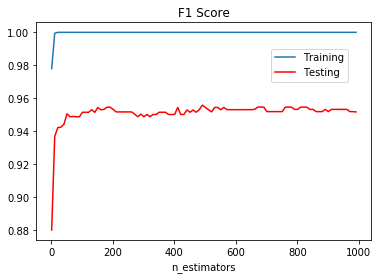

In [14]:
plt.plot(n_estimators, f1_score_train, '-', label='Training')
plt.plot(n_estimators, f1_score_test, 'r-', label='Testing')
plt.legend(bbox_to_anchor=(0.7, 0.88), loc='upper left', borderaxespad=0.)

plt.xlabel("n_estimators")
plt.title("F1 Score")
#plt.savefig(os.path.join(PATH_RESULTS, filename_learn + '.png'))
plt.show()

In [15]:
max_f1_score = 0
best_n_estim = 0

for i in range(0, len(n_estimators)):
    if f1_score_test[i] > max_f1_score:
        max_f1_score = f1_score_test[i]
        best_n_estim = n_estimators[i]  

best_n_estim, max_f1_score 

(491, 0.9557605929929173)

In [18]:
test_no_bootstrap = RandomForestClassifier(n_estimators=491, n_jobs=-1, random_state=SEED_RND, bootstrap=False)
test_no_bootstrap.fit(X_train, Y_train)

y_pred = test_no_bootstrap.predict(X_val)

accuracy, f1 = scores(test_no_bootstrap, X_val, Y_val)
print("Accuracy: " + "%.4f" % accuracy)
print("F1 Score: " + "%.4f" % f1)

Accuracy: 0.9535
F1 Score: 0.9563


## Use best n_estimators

In [8]:
best_n_estim=491

In [9]:
random_forest_clf = RandomForestClassifier(n_estimators=best_n_estim, n_jobs=-1, random_state=SEED_RND)
random_forest_clf.fit(X_train, Y_train)

y_pred = random_forest_clf.predict(X_val)

accuracy, f1 = scores(random_forest_clf, X_val, Y_val)
print("Accuracy: " + "%.4f" % accuracy)
print("F1 Score: " + "%.4f" % f1)

Accuracy: 0.9535
F1 Score: 0.9558


[[140   1   7   0]
 [  0 191   9   1]
 [  1   2  61   0]
 [  0   2   7 223]]


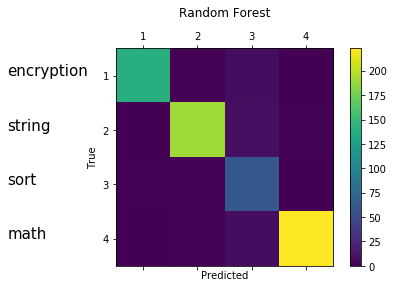

In [17]:
plot_conf_matrix('Random Forest', Y_val, y_pred)

### Features Importance

In [12]:
importance_dict = {}
for name, score in zip(x_meaning, random_forest_clf.feature_importances_):
    importance_dict[name]=score
len(importance_dict.keys())   

301

In [13]:
#ordering importance_dict
ordered_importance = {k: v for k, v in sorted(importance_dict.items(), reverse=True, key=lambda item: item[1])}

sum_impor = 0
for key in ordered_importance.keys():
    sum_impor = sum_impor + ordered_importance[key]
sum_impor

1.0000000000000002

In [51]:
n = 0
for key in ordered_importance.keys():
    print(key + ': ' + str(ordered_importance[key]))
    if n == 15:
        break
    n = n+1

xmm0: 0.04717972083068689
xmm: 0.044959791181544875
xmm1: 0.040796829484416236
binary_op: 0.0382851949644628
rdi: 0.03651605059873257
ucomisd: 0.0338672058930031
xor: 0.03233803844001686
js: 0.031599310967746354
eax: 0.029872271022533363
jp: 0.02809931329543312
je: 0.025807271101374044
num_asm_lines: 0.022901645225567358
register: 0.022407760271256287
xmm2: 0.020233337512850492
mov: 0.01930865341575236
rsi: 0.01719007513616124


In [14]:
#most important features
THRESOLD_IMPORTANCE = 0.0001
most_important_features_meaning=[]
most_important_features_index=[] #index in vector x
for key in ordered_importance.keys():
    if ordered_importance[key] < THRESOLD_IMPORTANCE:
        break
    most_important_features_meaning.append(key)
    most_important_features_index.append(x_meaning.index(key))
    
len(most_important_features_meaning)

137

In [22]:
#measure of total importance of the features selected
sum_importance = 0
for key in most_important_features_meaning:
    sum_importance = sum_importance + ordered_importance[key]
sum_importance

0.9986392445264015

#### Export dataset with features space reduced

In [15]:
def get_sub_list(src_list, list_index_to_export):
    dst_list = []
    for index in list_index_to_export:
        dst_list.append(src_list[index])
    return dst_list

In [16]:
def reduce_dataset(src_dataset, most_important_features_index):

    dict_out = {}
    dict_out['x_meaning'] = get_sub_list(src_dataset['x_meaning'], most_important_features_index)
    dict_out['y_meaning'] = src_dataset['y_meaning']
 
    dict_out['Y'] = src_dataset['Y']
    dict_out['IDs'] = src_dataset['IDs']
    dict_out['X'] = []
    
    for x in src_dataset['X']:
        new_x = get_sub_list(x, most_important_features_index)
        dict_out['X'].append(new_x)
    
    return dict_out

In [17]:
reduced_train_set = reduce_dataset(train_set, most_important_features_index)
reduced_validation_set = reduce_dataset(validation_set, most_important_features_index)

In [18]:
reduced_X_train = reduced_train_set['X']
reduced_Y_train = reduced_train_set['Y']

reduced_X_val = reduced_validation_set['X']
reduced_Y_val = reduced_validation_set['Y']

# SVM

In [27]:
from sklearn import svm

## Choose the Kernel

In [28]:
def svc_choose_kernel(kernel__, x_train, y_train, x_test, y_test):
    svm_ = svm.SVC(C=1.0, kernel=kernel__, degree=3, gamma='auto')
    svm_.fit(x_train, y_train)
    accuracy_, f1_score_ = scores(svm_, x_test, y_test)
    return accuracy_, f1_score_

### Standard Dataset

In [29]:
for kernel in ['poly','linear','rbf','sigmoid']:
    accuracy, f1 = svc_choose_kernel(kernel, X_train, Y_train, X_val, Y_val)
    print(kernel + ': ' + 'Accuracy=' +  "%.4f" % accuracy + ' F1_Score=' + "%.4f" % f1)

poly: Accuracy=0.9132 F1_Score=0.9150
linear: Accuracy=0.9395 F1_Score=0.9412
rbf: Accuracy=0.8357 F1_Score=0.8357
sigmoid: Accuracy=0.2124 F1_Score=0.1788


### Reduced Dataset

In [30]:
for kernel in ['poly','linear','rbf','sigmoid']:
    accuracy, f1 = svc_choose_kernel(kernel, reduced_X_train, reduced_Y_train, reduced_X_val, reduced_Y_val)
    print(kernel + ': ' + 'Accuracy=' +  "%.4f" % accuracy + ' F1_Score=' + "%.4f" % f1)

poly: Accuracy=0.9178 F1_Score=0.9198
linear: Accuracy=0.9426 F1_Score=0.9442
rbf: Accuracy=0.7845 F1_Score=0.7795
sigmoid: Accuracy=0.2729 F1_Score=0.1641


## Change parameter on the best model

Best model:
    kernel linear
    
    standard_dataset: Accuracy=0.9395 F1_Score=0.9412
    reduced_dataset:  Accuracy=0.9426 F1_Score=0.9442

    => better to use the reduced one

In [31]:
def svc_choose_c_hyper(kernel__, c_i,x_train, y_train, x_test, y_test):
    svm_ = svm.SVC(C=c_i, kernel=kernel__, degree=3, gamma='auto')
    svm_.fit(x_train, y_train)
    accuracy_, f1_score_ = scores(svm_, x_test, y_test)
    acc_train, f1_score_train = scores(svm_, x_train, y_train)
    return c_i, accuracy_, f1_score_, acc_train, f1_score_train 

In [32]:
res_C = []
for i in range(1, 100):
    c = i*0.1
    res_C.append(svc_choose_c_hyper('linear', c, reduced_X_train, reduced_Y_train, reduced_X_val, reduced_Y_val))

In [33]:
list_c=[]
list_accuracy=[]
list_f1 = []
list_train_acc = []
list_train_f1=[]
for i in range(0, len(res_C)):
    list_c.append(res_C[i][0])
    list_accuracy.append(res_C[i][1])
    list_f1.append(res_C[i][2])
    list_train_acc.append(res_C[i][3])
    list_train_f1.append(res_C[i][4])

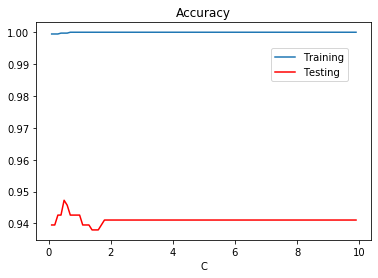

In [34]:
plt.plot(list_c, list_train_acc,'-', label='Training')
plt.plot(list_c, list_accuracy, 'r-', label='Testing')
plt.legend(bbox_to_anchor=(0.7, 0.88), loc='upper left', borderaxespad=0.)

plt.xlabel("C")
plt.title("Accuracy")
#plt.savefig(os.path.join(PATH_RESULTS, filename_learn + '.png'))
plt.show()

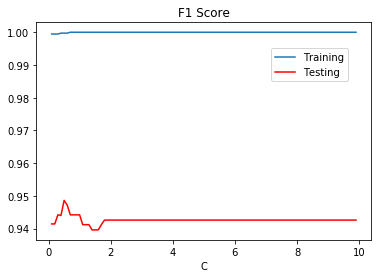

In [50]:
plt.plot(list_c, list_train_f1, '-', label='Training')
plt.plot(list_c, list_f1, 'r-', label='Testing')
plt.legend(bbox_to_anchor=(0.7, 0.88), loc='upper left', borderaxespad=0.)

plt.xlabel("C")
plt.title("F1 Score")
#plt.savefig(os.path.join(PATH_RESULTS, filename_learn + '.png'))
plt.show()

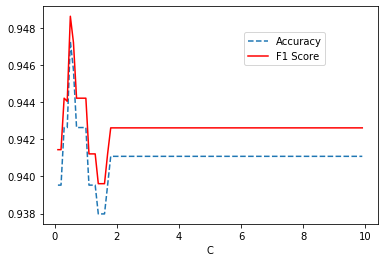

In [36]:
plt.plot(list_c, list_accuracy, '--', label='Accuracy')
plt.plot(list_c, list_f1, 'r-', label='F1 Score')

plt.xlabel('C')

plt.legend(bbox_to_anchor=(0.6, 0.88), loc='upper left', borderaxespad=0.)

#plt.axvline(0.4, color='black', alpha=0.7)

#plt.savefig(os.path.join(PATH_RESULTS, filename_learn + '.png'))
plt.show()

In [37]:
best_c = 0
best_acc = 0
best_f1 = 0
for i in range(0, len(list_f1)):
    if list_f1[i] > best_f1:
        best_f1=list_f1[i]
        best_c = list_c[i]
        best_acc = list_accuracy[i]
        
best_c,best_acc,best_f1

(0.5, 0.9472868217054263, 0.9486292092559973)

In [38]:
best_svm = svm.SVC(C=best_c, kernel='linear', degree=3, gamma='auto')
best_svm.fit(reduced_X_train, reduced_Y_train)
accuracy_, f1 = scores(best_svm, reduced_X_val, reduced_Y_val)
accuracy_, f1

(0.9472868217054263, 0.9486292092559973)

[[140   1   6   1]
 [  4 186   9   2]
 [  4   1  58   1]
 [  0   1   4 227]]


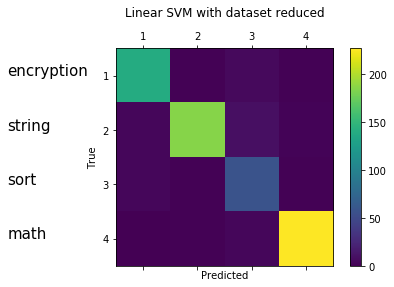

In [39]:
y_pred = best_svm.predict(reduced_X_val)
plot_conf_matrix('Linear SVM with dataset reduced', reduced_Y_val, y_pred)

# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
def knn_choose_nn(nn, x_train, y_train, x_test, y_test):
    knn_model = KNeighborsClassifier(n_neighbors=nn)
    knn_model.fit(x_train, y_train)

    acc, f1 = scores(knn_model, x_test, y_test)
    acc, f1 

    return acc, f1 

## Standard Dataset

In [42]:
analysis_nn_NN = [] #n_neighbors
analysis_nn_ACCUARACY = []
analysis_nn_F1_SCORE = []

for nn in range(1, 50):
    acc, f1 = knn_choose_nn(nn, X_train, Y_train, X_val, Y_val)
    analysis_nn_NN.append(nn)
    analysis_nn_ACCUARACY.append(acc)
    analysis_nn_F1_SCORE.append(f1)

In [43]:
max_accuracy = 0
max_f1 = 0
best_nn = 0

for i in range(0, len(analysis_nn_NN)):
    if analysis_nn_F1_SCORE[i] > max_f1:
        max_accuracy = analysis_nn_ACCUARACY[i]
        max_f1 = analysis_nn_F1_SCORE[i]
        best_nn = i+1

In [44]:
best_nn, max_accuracy, max_f1

(1, 0.9038759689922481, 0.9046199446259947)

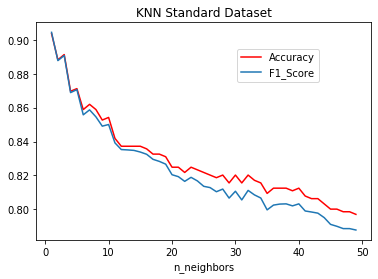

In [45]:
plt.plot(analysis_nn_NN, analysis_nn_ACCUARACY, 'r-', label='Accuracy')
plt.plot(analysis_nn_NN, analysis_nn_F1_SCORE,'-', label='F1_Score')

plt.title('KNN Standard Dataset')
plt.xlabel("n_neighbors")
plt.legend(bbox_to_anchor=(0.6, 0.88), loc='upper left', borderaxespad=0.)

#plt.savefig(os.path.join(PATH_RESULTS, filename_learn + '.png'))
plt.show() 

[[128   8   7   5]
 [  1 185   9   6]
 [  2  10  52   0]
 [  4   8   2 218]]


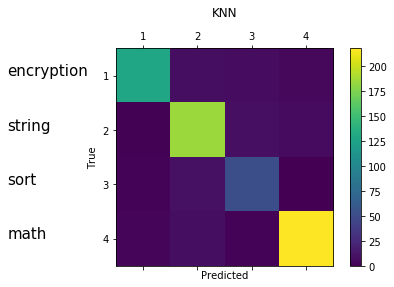

In [46]:
knn_model = KNeighborsClassifier(n_neighbors=best_nn)
knn_model.fit(X_train, Y_train)
y_pred = knn_model.predict(X_val)

plot_conf_matrix('KNN', Y_val, y_pred)

## Reduced Dataset

In [47]:
analysis_nn_NN = [] #n_neighbors
analysis_nn_ACCUARACY = []
analysis_nn_F1_SCORE = []

for nn in range(1, 50):
    acc, f1 = knn_choose_nn(nn, reduced_X_train, reduced_Y_train, reduced_X_val, reduced_Y_val)
    analysis_nn_NN.append(nn)
    analysis_nn_ACCUARACY.append(acc)
    analysis_nn_F1_SCORE.append(f1)

In [48]:
max_accuracy = 0
max_f1 = 0
best_nn = 0

for i in range(0, len(analysis_nn_NN)):
    if analysis_nn_F1_SCORE[i] > max_f1:
        max_accuracy = analysis_nn_ACCUARACY[i]
        max_f1 = analysis_nn_F1_SCORE[i]
        best_nn = i+1

In [49]:
best_nn, max_accuracy, max_f1

(1, 0.9023255813953488, 0.9030481028088676)

# ENSEMBLING

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm

rnd_clf = RandomForestClassifier(n_estimators=491, n_jobs=-1, random_state=SEED_RND)
svm_clf = svm.SVC(C=0.5, kernel='linear', gamma='auto')

voting_clf = VotingClassifier(estimators = [ ('rnd', rnd_clf), ('svm', svm_clf)], voting='hard')
voting_clf.fit(X_train, Y_train)

acc, f1 = scores(voting_clf, X_val, Y_val)
acc, f1 

(0.9441860465116279, 0.9457592268412491)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

rnd_clf = RandomForestClassifier(n_estimators=491, n_jobs=-1, random_state=SEED_RND)
svm_clf = svm.SVC(C=0.5, kernel='linear', gamma='auto')
log_clf = LogisticRegression()

voting_clf = VotingClassifier(estimators = [('log_clf', log_clf), ('rnd', rnd_clf), ('svm', svm_clf)], voting='hard')
voting_clf.fit(X_train, Y_train)

acc, f1 = scores(voting_clf, X_val, Y_val)
acc, f1 

(0.9534883720930233, 0.954748910907974)

In [25]:
rnd_clf = RandomForestClassifier(n_estimators=491, n_jobs=-1, random_state=SEED_RND)
svm_clf = svm.SVC(C=0.5, kernel='linear', gamma='auto')

voting_clf = VotingClassifier(estimators = [ ('rnd', rnd_clf), ('svm', svm_clf)], voting='hard')
voting_clf.fit(reduced_X_train, reduced_Y_train)

acc, f1 = scores(voting_clf, reduced_X_val, reduced_Y_val)
acc, f1 

(0.9410852713178295, 0.9430134697776138)

In [26]:
rnd_clf = RandomForestClassifier(n_estimators=491, n_jobs=-1, random_state=SEED_RND)
svm_clf = svm.SVC(C=0.5, kernel='linear', gamma='auto')
log_clf = LogisticRegression()

voting_clf = VotingClassifier(estimators = [('log_clf', log_clf), ('rnd', rnd_clf), ('svm', svm_clf)], voting='hard')
voting_clf.fit(reduced_X_train, reduced_Y_train)

acc, f1 = scores(voting_clf, reduced_X_val, reduced_Y_val)
acc, f1 

(0.958139534883721, 0.9596716128909836)